In [1]:
from tensorflow.keras.datasets import reuters
(X_train, y_train), (X_test, y_test) = reuters.load_data(num_words=10000)

2110848/2110848 [==============================] - 2s 1us/step


In [2]:
import numpy as np 
def vectorize_sequences(sequences , dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
X_train = vectorize_sequences(X_train)
X_test = vectorize_sequences(X_test)

In [3]:
#as there are not only two labels, we need to one hot encode the labels as well
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
    

In [6]:
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential([
layers.Dense(64, activation="relu"),
layers.Dense(64, activation="relu"),
layers.Dense(46, activation="softmax")
])

In [7]:
model.compile(optimizer="rmsprop",
loss="categorical_crossentropy",
metrics=["accuracy"])

In [8]:
#Validating your approach
x_val = X_train[:1000]
partial_x_train = X_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

In [9]:
#Training the model
history = model.fit(partial_x_train,
partial_y_train,
epochs=20,
batch_size=512,
validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 5s 109ms/step - loss: 2.6238 - accuracy: 0.5147 - val_loss: 1.7796 - val_accuracy: 0.5980
Epoch 2/20
16/16 [==============================] - 1s 76ms/step - loss: 1.5170 - accuracy: 0.6708 - val_loss: 1.3504 - val_accuracy: 0.6910
Epoch 3/20
16/16 [==============================] - 1s 72ms/step - loss: 1.1702 - accuracy: 0.7359 - val_loss: 1.1786 - val_accuracy: 0.7400
Epoch 4/20
16/16 [==============================] - 1s 74ms/step - loss: 0.9557 - accuracy: 0.7892 - val_loss: 1.0624 - val_accuracy: 0.7720
Epoch 5/20
16/16 [==============================] - 1s 73ms/step - loss: 0.7976 - accuracy: 0.8267 - val_loss: 0.9944 - val_accuracy: 0.7810
Epoch 6/20
16/16 [==============================] - 1s 73ms/step - loss: 0.6669 - accuracy: 0.8566 - val_loss: 0.9390 - val_accuracy: 0.8090
Epoch 7/20
16/16 [==============================] - 1s 75ms/step - loss: 0.5592 - accuracy: 0.8811 - val_loss: 0.9234 - val_accuracy: 0.8020
Epoch 8/20
1

In [10]:
import pandas as pd

In [11]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,2.623795,0.514658,1.779649,0.598
1,1.516969,0.670759,1.350356,0.691
2,1.170248,0.735906,1.178605,0.740
3,0.955682,0.789151,1.062404,0.772
4,0.797585,0.826735,0.994445,0.781
5,0.666859,0.856552,0.938957,0.809
6,0.559223,0.881108,0.923360,0.802
7,0.470892,0.901528,0.869249,0.810
8,0.400038,0.913806,0.856690,0.809
9,0.340587,0.925457,0.850343,0.817


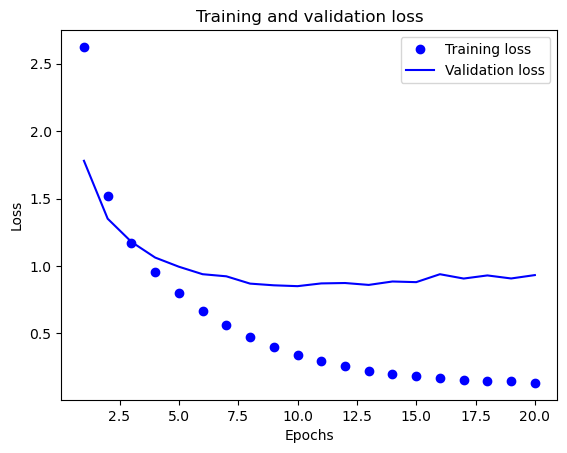

In [14]:
import matplotlib.pyplot as plt
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

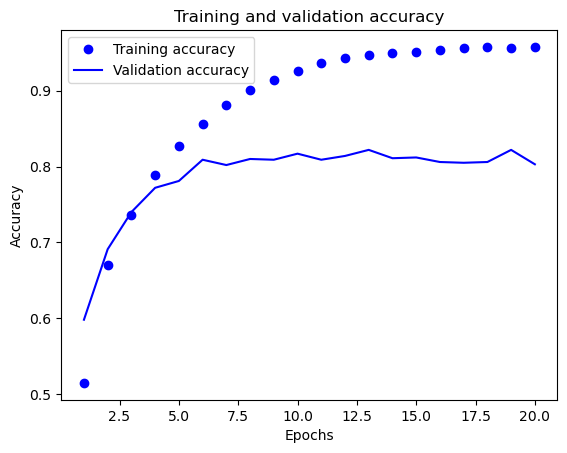

In [15]:
plt.clf()
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [18]:
model = keras.Sequential([
layers.Dense(64, activation="relu"),layers.Dense(64, activation="relu"),layers.Dense(46, activation="softmax")])
model.compile(optimizer="rmsprop",loss="categorical_crossentropy",metrics=["accuracy"])
model.fit(X_train,y_train,epochs=9,batch_size=512)
results = model.evaluate(X_test, y_test)    

Epoch 1/9
18/18 [==============================] - 2s 65ms/step - loss: 2.6929 - accuracy: 0.5233
Epoch 2/9
18/18 [==============================] - 1s 71ms/step - loss: 1.4780 - accuracy: 0.6883
Epoch 3/9
18/18 [==============================] - 1s 69ms/step - loss: 1.1163 - accuracy: 0.7525
Epoch 4/9
18/18 [==============================] - 1s 65ms/step - loss: 0.9014 - accuracy: 0.8066
Epoch 5/9
18/18 [==============================] - 1s 66ms/step - loss: 0.7449 - accuracy: 0.8409
Epoch 6/9
18/18 [==============================] - 1s 63ms/step - loss: 0.6148 - accuracy: 0.8686
Epoch 7/9
18/18 [==============================] - 1s 64ms/step - loss: 0.5142 - accuracy: 0.8899
Epoch 8/9
18/18 [==============================] - 1s 63ms/step - loss: 0.4352 - accuracy: 0.9085
Epoch 9/9
71/71 [==============================] - 1s 6ms/step - loss: 0.8986 - accuracy: 0.7947


In [19]:
results

[0.8985878825187683, 0.7947462201118469]

In [29]:
X_test[0].shape

(10000,)

In [32]:
y_pred=model.predict(X_test[0].reshape(1,10000))

1/1 [==============================] - 0s 30ms/step


In [37]:
np.argmax(y_pred)

3

In [34]:
y_pred

array([[1.32416259e-04, 5.90498443e-04, 3.09874758e-06, 5.65127492e-01,
        4.19710636e-01, 2.12923951e-05, 1.63019540e-05, 5.70308766e-05,
        9.65664978e-04, 1.69005114e-04, 8.18130211e-05, 2.67834077e-03,
        3.10972187e-04, 3.31532734e-04, 1.40934746e-04, 8.71385273e-05,
        1.50854071e-03, 3.91207344e-04, 1.24963233e-03, 7.57858972e-04,
        2.20793765e-03, 3.44360131e-04, 9.50224603e-06, 9.90749977e-05,
        8.32492060e-06, 4.20018332e-05, 4.08201913e-06, 2.71955996e-05,
        2.18672154e-04, 3.61161598e-04, 2.77653162e-04, 1.55253845e-04,
        5.95440324e-05, 4.45276564e-05, 1.98825182e-05, 3.74676824e-06,
        3.15617246e-04, 7.35218418e-06, 1.02412094e-04, 1.11393537e-03,
        9.45762895e-06, 1.52530585e-04, 7.49636320e-06, 1.35972223e-05,
        4.61357695e-06, 5.86122223e-05]], dtype=float32)